<a href="https://colab.research.google.com/github/Vinayak-Sharma12/LangGraph/blob/main/8_Parallelization(Story_based_on_Char%2Bsetting%2Bplot).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q langchain_groq langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 832.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.6/129.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 14.8 MB/s eta 0:00:00


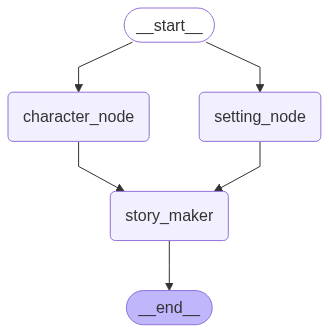

In [17]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [2]:
from langchain_groq import ChatGroq
llm=ChatGroq(model='llama-3.1-8b-instant',api_key='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')

## **CREATE STATE**

In [21]:
from typing import TypedDict
class State(TypedDict):
  topic:str
  characters:str
  setting:str
  story:str


## **CREATE NODES**

In [22]:
def character_node(state:State):
  return {'characters':llm.invoke(f"Generate two character and brief their traits for the story whose topic is {state['topic']}").content}

In [28]:
def setting_node(state:State):
  return {'setting':llm.invoke(f"Generate a setting for the story whose topic is {state['topic']}").content}

In [29]:
def story_maker(state:State):
  prompt=f"you are given characters and their traits brief {state['characters']},setting of the story {state['setting']}.Generate a short story on this"
  return {'story':llm.invoke(prompt).content}


## **GRAPH**

In [30]:
from langgraph.graph import StateGraph,START,END
#Define StateGraph
builder=StateGraph(State)
#Add Nodes
builder.add_node("character_node",character_node)
builder.add_node("setting_node",setting_node)
builder.add_node("story_maker",story_maker)
#Add Edges
builder.add_edge(START,"character_node")
builder.add_edge(START,"setting_node")
builder.add_edge("character_node","story_maker")
builder.add_edge("setting_node","story_maker")
builder.add_edge("story_maker",END)
#Compile
graph=builder.compile()

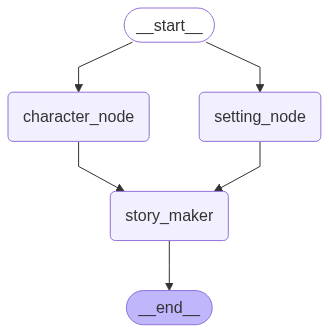

In [31]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [32]:
graph.invoke({"topic":"time travel"})

{'topic': 'time travel',
 'characters': "Here are two character profiles for a time travel story:\n\n**1. Alex Chen**\n\n- **Age:** 25\n- **Occupation:** Physicist\n- **Personality:** Alex is a brilliant and ambitious scientist who has spent years studying the mysteries of time travel. He's driven, confident, and often comes across as arrogant to those who don't know him. Despite this, he has a soft spot for his friends and family and will go to great lengths to protect them.\n- **Background:** Alex grew up in a family of scientists and engineers. From a young age, he was fascinated by the laws of physics and the possibility of time travel. He spent years researching and experimenting, eventually developing a functioning time machine.\n- **Skills:** Genius-level intellect, expert in physics and engineering, skilled in hand-to-hand combat.\n- **Motivation:** Alex's primary motivation is to use his time machine to prevent a catastrophic event that has yet to occur. He believes that he ha